# Loyal Health Data Science Coding Challenge

Instructions: The following questions are designed to assess your understanding of common data science concepts with which you should be familiar. We’ll have you complete some basic analysis over text reviews and their metadata from the popular music review site Pitchfork (https://pitchfork.com/). The data can be downloaded here (https://www.kaggle.com/nolanbconaway/pitchfork-data) in the form of a SQLite database.  We expect this to take around 2 hours (at most 3 hours) to complete. Although the completion of the assignment will not be strictly timed, please do not go over the allotted time. If time is an issue, focus the most on problems 2, 4, and 5. 

Write all of your code in this Jupyter notebook. When you’ve completed the assessment, please create a GitHub repository, and email us a link to this repository.


In [1]:
# Import here
import sqlite3
import pandas as pd
from pandasql import sqldf
import numpy as np
from termcolor import colored,cprint
from functools import reduce
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy.builtins import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
### Connection to database
con = sqlite3.connect('C:/Users/thenu/Desktop/Loyal Health/database.sqlite/database.sqlite')
artists = pd.read_sql('select * from artists',con)
content = pd.read_sql('select * from content',con)
genres = pd.read_sql('select * from genres',con)
labels = pd.read_sql('select * from labels',con)
reviews = pd.read_sql('select * from reviews',con)
years = pd.read_sql('select * from years',con)

# close the connection to the sqllite database
con.close()

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

##### Data pre-processing : Reviews table

In [4]:
cprint("reviews table first 5 rows:",attrs=['bold'])
reviews.head()

cprint("Number of duplicate rows in reviews table:",attrs=['bold'])
reviews.duplicated().sum()

cprint("Print the duplicate rows:",attrs=['bold'])
reviews.loc[reviews.duplicated(),:]

cprint("Print duplicate rows of reviewid 9460:",attrs=['bold'])
reviews.loc[reviews['reviewid'] == 9460]

Reviews = reviews.drop_duplicates()

cprint("Size of reviews table before and after removal of duplicates:",attrs=['bold'])
reviews.shape
Reviews.shape

cprint("Number of duplicate rows in Reviews table after removal of duplicates:",attrs=['bold'])
Reviews.duplicated().sum()

cprint("Number of nulls in Reviews table:",attrs=['bold'])
Reviews.isnull().sum()

reviews table first 5 rows:


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.30000,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.90000,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.10000,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


Number of duplicate rows in reviews table:


4

Print the duplicate rows:


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
12120,9417,radiodread,easy star all-stars,http://pitchfork.com/reviews/albums/9417-radio...,7.00000,0,joe tangari,contributor,2006-10-11,2,11,10,2006
12121,9505,the dfa remixes: chapter two,various artists,http://pitchfork.com/reviews/albums/9505-the-d...,8.20000,0,tim finney,None,2006-10-10,1,10,10,2006
12122,9499,young machetes,the blood brothers,http://pitchfork.com/reviews/albums/9499-young...,6.20000,0,jason crock,None,2006-10-10,1,10,10,2006
12123,9460,subliminal genocide,xasthur,http://pitchfork.com/reviews/albums/9460-subli...,7.80000,0,brandon stosuy,contributor,2006-10-10,1,10,10,2006


Print duplicate rows of reviewid 9460:


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
12119,9460,subliminal genocide,xasthur,http://pitchfork.com/reviews/albums/9460-subli...,7.80000,0,brandon stosuy,contributor,2006-10-10,1,10,10,2006
12123,9460,subliminal genocide,xasthur,http://pitchfork.com/reviews/albums/9460-subli...,7.80000,0,brandon stosuy,contributor,2006-10-10,1,10,10,2006


Size of reviews table before and after removal of duplicates:


(18393, 13)

(18389, 13)

Number of duplicate rows in Reviews table after removal of duplicates:


0

Number of nulls in Reviews table:


reviewid             0
title                0
artist               0
url                  0
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
dtype: int64

##### Data pre-processing : Genres table

In [5]:
cprint("genres table first 5 rows:",attrs=['bold'])
genres.head()

cprint("Number of duplicate rows in genres table:",attrs=['bold'])
genres.duplicated().sum()

cprint("Print the duplicate rows:",attrs=['bold'])
genres.loc[genres.duplicated(),:]

cprint("Print duplicate rows of reviewid 9460:",attrs=['bold'])
genres.loc[genres['reviewid'] == 9460]

Genres = genres.drop_duplicates()

cprint("Size of genres table before and after removal of duplicates:",attrs=['bold'])
genres.shape
Genres.shape

cprint("Number of duplicate rows in Genres table after removal of duplicates:",attrs=['bold'])
Genres.duplicated().sum()

genres table first 5 rows:


,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


Number of duplicate rows in genres table:


5

Print the duplicate rows:


,reviewid,genre
14631,9417,global
14632,9505,None
14633,9499,None
14634,9460,rock
14635,9460,metal


Print duplicate rows of reviewid 9460:


,reviewid,genre
14629,9460,rock
14630,9460,metal
14634,9460,rock
14635,9460,metal


Size of genres table before and after removal of duplicates:


(22680, 2)

(22675, 2)

Number of duplicate rows in Genres table after removal of duplicates:


0

In [6]:
## Create one row per reviewid with all genres of that reviewid in one column separated by comma
Genres1 = Genres.groupby('reviewid').apply(lambda x: list(x.genre)).to_frame()
Genres1.columns = ['genre']
Genres1.reset_index(level=0, inplace=True)
Genres1['genre'] = Genres1['genre'].apply(lambda x: ','.join(map(str, x)))

cprint("Shape of Genres table after creating one row per reviewid:",attrs=['bold'])
print(Genres1.shape)
Genres1.head()

Shape of Genres table after creating one row per reviewid:
(18389, 2)


,reviewid,genre
0,1,rock
1,6,electronic
2,7,electronic
3,8,electronic
4,10,jazz


In [7]:
## Create dummy for each genre:
dummy = pd.get_dummies(Genres['genre'])

cprint("Shape before and after adding dummies for each genre:",attrs=['bold'])
print(dummy.shape)
print(Genres.shape)

Shape before and after adding dummies for each genre:
(22675, 9)
(22675, 2)


In [8]:
## Concat dummies with Genres table:
Genres_dummy = pd.concat([Genres['reviewid'],dummy], axis = 1)

cprint("Shape of Genres table with reviewid after adding dummies for each genre:",attrs=['bold'])
print(Genres_dummy.shape)

cprint("\n Print the first 5 rows of Genres table:",attrs=['bold'])
Genres_dummy.head()

Shape of Genres table with reviewid after adding dummies for each genre:
(22675, 10)

 Print the first 5 rows of Genres table:


,reviewid,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,22703,1,0,0,0,0,0,0,0,0
1,22721,0,0,0,0,0,1,0,0,0
2,22659,0,0,0,0,0,0,0,0,1
3,22661,0,0,0,0,0,0,0,0,1
4,22725,1,0,0,0,0,0,0,0,0


In [9]:
## Create a row per reviewid
cprint("Shape after creating one row per reviewid with reviewid set as the index:",attrs=['bold'])
Genres_grpd = Genres_dummy.groupby('reviewid').sum()
print(Genres_grpd.shape)

cprint("\n Shape of the final genres table with one row per reviewid and resetting index with separate columns for each genre:",attrs=['bold'])
Genres_grpd.reset_index(level=0, inplace=True)
print(Genres_grpd.shape)

cprint("\n First 5 rows of the cleaned genres table with one row per reviewid:",attrs=['bold'])
Genres_grpd.head()

cprint("Number of nulls in Genres table:",attrs=['bold'])
Genres_grpd.isnull().sum()

Shape after creating one row per reviewid with reviewid set as the index:
(18389, 9)

 Shape of the final genres table with one row per reviewid and resetting index with separate columns for each genre:
(18389, 10)

 First 5 rows of the cleaned genres table with one row per reviewid:


,reviewid,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,1,0,0,0,0,0,0,0,0,1
1,6,1,0,0,0,0,0,0,0,0
2,7,1,0,0,0,0,0,0,0,0
3,8,1,0,0,0,0,0,0,0,0
4,10,0,0,0,0,1,0,0,0,0


Number of nulls in Genres table:


reviewid        0
electronic      0
experimental    0
folk/country    0
global          0
jazz            0
metal           0
pop/r&b         0
rap             0
rock            0
dtype: int64

##### Data pre-processing : Content table

In [10]:
cprint("content table first 5 rows:",attrs=['bold'])
content.head()

cprint("Number of duplicate rows in content table:",attrs=['bold'])
content.duplicated().sum()

cprint("Print the duplicate rows:",attrs=['bold'])
content.loc[content.duplicated(),:]

cprint("Print duplicate rows of reviewid 9460:",attrs=['bold'])
content.loc[content['reviewid'] == 9460]

Content = content.drop_duplicates()

cprint("Size of Content table before and after removal of duplicates:",attrs=['bold'])
content.shape
Content.shape

cprint("Number of duplicate rows in Content table after removal of duplicates:",attrs=['bold'])
Content.duplicated().sum()

cprint("Number of nulls in Content table:",attrs=['bold'])
Content.isnull().sum()

content table first 5 rows:


,reviewid,content
0,22703,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,"Eight years, five albums, and two EPs in, the ..."
2,22659,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,Kleenex began with a crash. It transpired one ...
4,22725,It is impossible to consider a given release b...


Number of duplicate rows in content table:


4

Print the duplicate rows:


,reviewid,content
12120,9417,\r\n A song-for-song reggae cover of Radioh...
12121,9505,\nOn the one hand it is a largely superfluous ...
12122,9499,"When we last left our heroes, the Blood Brothe..."
12123,9460,Strange things are a foot in the bowels of hel...


Print duplicate rows of reviewid 9460:


,reviewid,content
12119,9460,Strange things are a foot in the bowels of hel...
12123,9460,Strange things are a foot in the bowels of hel...


Size of Content table before and after removal of duplicates:


(18393, 2)

(18389, 2)

Number of duplicate rows in Content table after removal of duplicates:


0

Number of nulls in Content table:


reviewid    0
content     0
dtype: int64

##### Data pre-processing : Labels table

In [11]:
cprint("labels table first 5 rows:",attrs=['bold'])
labels.head()

cprint("Number of duplicate rows in labels table:",attrs=['bold'])
labels.duplicated().sum()

cprint("Print the duplicate rows:",attrs=['bold'])
labels.loc[labels.duplicated(),:]

cprint("Print duplicate rows of reviewid 9460:",attrs=['bold'])
labels.loc[labels['reviewid'] == 9460]

Labels = labels.drop_duplicates()

cprint("Size of labels table before and after removal of duplicates:",attrs=['bold'])
labels.shape
Labels.shape

cprint("Number of duplicate rows in Labels table after removal of duplicates:",attrs=['bold'])
Labels.duplicated().sum()

cprint("Number of Nulls in Labels table after removal of duplicates:",attrs=['bold'])
Labels.isnull().sum()

cprint("Number of duplicate reviewids in Labels table:",attrs=['bold'])
Labels['reviewid'].duplicated().sum()

labels table first 5 rows:


,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


Number of duplicate rows in labels table:


5

Print the duplicate rows:


,reviewid,label
13442,9417,easy star
13443,9505,astralwerks
13444,9505,dfa
13445,9499,v2
13446,9460,hydra head


Print duplicate rows of reviewid 9460:


,reviewid,label
13441,9460,hydra head
13446,9460,hydra head


Size of labels table before and after removal of duplicates:


(20190, 2)

(20185, 2)

Number of duplicate rows in Labels table after removal of duplicates:


0

Number of Nulls in Labels table after removal of duplicates:


reviewid     0
label       38
dtype: int64

Number of duplicate reviewids in Labels table:


1796

In [12]:
## Create one row per reviewid with all labels of that reviewid in one column separated by comma
Labels1 = Labels.groupby('reviewid').apply(lambda x: list(x.label)).to_frame()
Labels1.columns = ['label']
Labels1.reset_index(level=0, inplace=True)

Labels1['label'] = Labels1['label'].apply(lambda x: ','.join(map(str, x)))

cprint("Shape of Labels table after creating one row per reviewid:",attrs=['bold'])
print(Labels1.shape)
Labels1.head()

cprint("Number of nulls in Labels table:",attrs=['bold'])
Labels1.isnull().sum()

Shape of Labels table after creating one row per reviewid:
(18389, 2)


,reviewid,label
0,1,rough trade
1,6,silber
2,7,darla
3,8,darla
4,10,troubleman unlimited


Number of nulls in Labels table:


reviewid    0
label       0
dtype: int64

In [13]:
## Create one row per reviewid with all labels of that reviewid in separate columns
Labels2 = Labels.copy()
Labels2['ix'] = Labels2.groupby('reviewid').cumcount()
Labels2 = Labels2.pivot(index='reviewid', columns='ix', values='label')
Labels2.columns = ['label1','label2','label3','label4','label5']
Labels2.reset_index(level=0, inplace=True)

cprint("Shape of Labels table after creating one row per reviewid with separate columns for each label :",attrs=['bold'])
print(Labels2.shape)
Labels2.head()

Shape of Labels table after creating one row per reviewid with separate columns for each label :
(18389, 6)


,reviewid,label1,label2,label3,label4,label5
0,1,rough trade,NaN,NaN,NaN,NaN
1,6,silber,NaN,NaN,NaN,NaN
2,7,darla,NaN,NaN,NaN,NaN
3,8,darla,NaN,NaN,NaN,NaN
4,10,troubleman unlimited,NaN,NaN,NaN,NaN


##### Data pre-processing : Years table

In [14]:
cprint("years table first 5 rows:",attrs=['bold'])
years.head()

cprint("Number of duplicate rows in years table:",attrs=['bold'])
years.duplicated().sum()

cprint("Print the duplicate rows:",attrs=['bold'])
years.loc[years.duplicated(),:]

cprint("Print duplicate rows of reviewid 9460:",attrs=['bold'])
years.loc[years['reviewid'] == 9460]

Years = years.drop_duplicates()

cprint("Size of years table before and after removal of duplicates:",attrs=['bold'])
years.shape
Years.shape

cprint("Check number of duplicate rows in Years table after removal of duplicates:",attrs=['bold'])
Years.duplicated().sum()

cprint("Number of Nulls in Years table after removal of duplicates:",attrs=['bold'])
Years.isnull().sum()

cprint("Number of duplicate reviewids in Years table:",attrs=['bold'])
Years['reviewid'].duplicated().sum()

years table first 5 rows:


,reviewid,year
0,22703,1998.00000
1,22721,2016.00000
2,22659,2016.00000
3,22661,2016.00000
4,22725,2016.00000


Number of duplicate rows in years table:


4

Print the duplicate rows:


,reviewid,year
12586,9417,2006.00000
12587,9505,2006.00000
12588,9499,2006.00000
12589,9460,2006.00000


Print duplicate rows of reviewid 9460:


,reviewid,year
12585,9460,2006.00000
12589,9460,2006.00000


Size of years table before and after removal of duplicates:


(19108, 2)

(19104, 2)

Check number of duplicate rows in Years table after removal of duplicates:


0

Number of Nulls in Years table after removal of duplicates:


reviewid      0
year        406
dtype: int64

Number of duplicate reviewids in Years table:


715

In [15]:
## Create one row per reviewid with all years of that reviewid in one column separated by comma
Years1 = Years.groupby('reviewid').apply(lambda x: list(x.year)).to_frame()
Years1.columns = ['year']
Years1.reset_index(level=0, inplace=True)
Years1['year'] = Years1['year'].apply(lambda x: ','.join(map(str, x)))

cprint("Shape of Years table after creating one row per reviewid:",attrs=['bold'])
print(Years1.shape)
Years1.head()

cprint("Number of nulls in Years table:",attrs=['bold'])
Years1.isnull().sum()

Shape of Years table after creating one row per reviewid:
(18389, 2)


,reviewid,year
0,1,2004.0
1,6,2003.0
2,7,2002.0
3,8,2005.0
4,10,2002.0


Number of nulls in Years table:


reviewid    0
year        0
dtype: int64

In [16]:
## Create one row per reviewid with all years of that reviewid in separate columns
Years2 = Years.copy()
Years2['ix'] = Years2.groupby('reviewid').cumcount()
Years2 = Years2.pivot(index='reviewid', columns='ix', values='year')
Years2.columns = ['year1','year2']
Years2.reset_index(level=0, inplace=True)

cprint("Shape of Years table after creating one row per reviewid with separate columns for each year :",attrs=['bold'])
print(Years2.shape)
Years2.head()

Shape of Years table after creating one row per reviewid with separate columns for each year :
(18389, 3)


,reviewid,year1,year2
0,1,2004.00000,nan
1,6,2003.00000,nan
2,7,2002.00000,nan
3,8,2005.00000,nan
4,10,2002.00000,nan


##### Data pre-processing : Artists table

In [17]:
cprint("artists table first 5 rows:",attrs=['bold'])
artists.head()

cprint("Number of duplicate rows in artists table:",attrs=['bold'])
artists.duplicated().sum()

cprint("Size of artists table:",attrs=['bold'])
artists.shape

Artists = artists.drop_duplicates()

cprint("Size of artists table after dropping duplicates:",attrs=['bold'])
Artists.shape

cprint("Number of Nulls in artists table after removal of duplicates:",attrs=['bold'])
Artists.isnull().sum()

cprint("Number of duplicate reviewids in artists table:",attrs=['bold'])
Artists['reviewid'].duplicated().sum()

artists table first 5 rows:


,reviewid,artist
0,22703,massive attack
1,22721,krallice
2,22659,uranium club
3,22661,kleenex
4,22661,liliput


Number of duplicate rows in artists table:


4

Size of artists table:


(18831, 2)

Size of artists table after dropping duplicates:


(18827, 2)

Number of Nulls in artists table after removal of duplicates:


reviewid    0
artist      0
dtype: int64

Number of duplicate reviewids in artists table:


438

In [18]:
## Create one row per reviewid with all artists of that reviewid in one column separated by comma
Artists1 = Artists.groupby('reviewid').apply(lambda x: list(x.artist)).to_frame()
Artists1.columns = ['artist']
Artists1.reset_index(level=0, inplace=True)
Artists1['artist'] = Artists1['artist'].apply(lambda x: ','.join(map(str, x)))

cprint("Shape of Artists table after creating one row per reviewid:",attrs=['bold'])
print(Artists1.shape)
Artists1.head()

Shape of Artists table after creating one row per reviewid:
(18389, 2)


,reviewid,artist
0,1,aberfeldy
1,6,aarktica
2,7,aarktica
3,8,aarktica
4,10,abcs


In [19]:
## Create one row per reviewid with all years of that reviewid in separate columns
Artists2 = Artists.copy()
Artists2['ix'] = Artists2.groupby('reviewid').cumcount()
Artists2 = Artists2.pivot(index='reviewid', columns='ix', values='artist')
Artists2.columns = ['artist1','artist2','artist3','artist4','artist5','artist6','artist7']
Artists2.reset_index(level=0, inplace=True)

cprint("Shape of Artists table after creating one row per reviewid with separate columns for each year :",attrs=['bold'])
print(Artists2.shape)
Artists2.head()

Shape of Artists table after creating one row per reviewid with separate columns for each year :
(18389, 8)


,reviewid,artist1,artist2,artist3,artist4,artist5,artist6,artist7
0,1,aberfeldy,NaN,NaN,NaN,NaN,NaN,NaN
1,6,aarktica,NaN,NaN,NaN,NaN,NaN,NaN
2,7,aarktica,NaN,NaN,NaN,NaN,NaN,NaN
3,8,aarktica,NaN,NaN,NaN,NaN,NaN,NaN
4,10,abcs,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Cursory Data Analysis:
a) Compute the number of albums belonging to each genre. You should notice that some albums have multiple genres listed (e.g. Folk/Country,Pop/R&B,Rock) separated by commas. Consider albums with multiple genres as belonging to each of those genres (i.e. an album with Rap,Rock as it’s genres will be counted as one Rap album and one Rock album). 

b) Compute the number of albums released each year.

c) Compute the ten artists with the highest number of albums reviewed in the data set.

d) Compute the mean, median, standard deviation, minimum, and maximum album scores. 

e) Compute the average score by each review author and return the result in a dataframe sort in descending order.

f) Compute the average album score per artist and return the result in a dataframe with an additional column for the number of albums they’ve had reviewed.
    i) Return the artists with the top 10 highest average scores
    ii) Return the artists with the top 10 lowest average scores


##### 1.a) Number of albums belonging to each genre

In [20]:
## Number of albums in each genre
cprint("Number of albums in each genre:",attrs=['bold'])
df = pd.DataFrame(Genres.groupby('genre').reviewid.nunique())
df.columns = ['# of Albums']
df.reset_index(level=0, inplace=True)
df

Number of albums in each genre:


,genre,# of Albums
0,electronic,3874
1,experimental,1815
2,folk/country,685
3,global,216
4,jazz,435
5,metal,859
6,pop/r&b,1432
7,rap,1559
8,rock,9435


##### 1.b) Number of albums released each year

In [21]:
## Number of albums released each year
cprint("Number of albums released each year:",attrs=['bold'])
df = pd.DataFrame(Reviews.groupby('pub_year').reviewid.nunique())
df.columns = ['# of Albums']
df.reset_index(level=0, inplace=True)
df

Number of albums released each year:


,pub_year,# of Albums
0,1999,223
1,2000,348
2,2001,456
3,2002,923
4,2003,1060
5,2004,1121
6,2005,1186
7,2006,1185
8,2007,1216
9,2008,1201


##### 1.c) Ten artists with the highest number of albums reviewed in the data set.

In [22]:
cprint("Artists with highest number of albums reviewed:",attrs=['bold'])
df = pd.DataFrame(Artists.groupby('artist').reviewid.count().sort_values(ascending=False))
df.columns = ['# of Albums']
df.reset_index(level=0, inplace=True)
df.head(11)

Artists with highest number of albums reviewed:


,artist,# of Albums
0,various artists,687
1,guided by voices,23
2,neil young,23
3,bonnie prince billy,22
4,david bowie,21
5,the beatles,21
6,of montreal,20
7,mogwai,20
8,gucci mane,20
9,robert pollard,19


##### 1.d) mean, median, standard deviation, minimum, and maximum album scores

In [23]:
print("Mean, SD, Min and Max values of score:","\n",Reviews['score'].describe(),"\n")
print("Median of score: ", Reviews['score'].median())

Mean, SD, Min and Max values of score: 
 count   18389.00000
mean        7.00572
std         1.29376
min         0.00000
25%         6.40000
50%         7.20000
75%         7.80000
max        10.00000
Name: score, dtype: float64 

Median of score:  7.2


##### 1.e) Compute the average score by each review author and return the result in a dataframe sort in descending order.

In [24]:
df = pd.DataFrame(Reviews.groupby('author').score.mean().sort_values(ascending=False))
df.columns = ['Average Score']
df.reset_index(level=0, inplace=True)

cprint("First 10 rows of the dataframe with average score by each review author :",attrs=['bold'])
df.head(10)

First 10 rows of the dataframe with average score by each review author :


,author,Average Score
0,nelson george,10.00000
1,maura johnston,10.00000
2,carvell wallace,9.83333
3,dorian lynskey,9.50000
4,alan light,9.40000
5,rollie pemberton & nick sylvester,9.40000
6,daphne a. brooks,9.20000
7,andrew nosnitsky,9.10000
8,amanda petrusich,9.00000
9,seth colter-walls,9.00000


##### 1.f) average album score per artist and return the result in a dataframe with an additional column for the number of albums they’ve had reviewed. i) Return the artists with the top 10 highest average scores ii) Return the artists with the top 10 lowest average scores

In [25]:
df = pd.merge(Artists, Reviews, on=['reviewid'], how='outer')
df = df.drop(columns = ['artist_y'])

df1 = pd.DataFrame(df.groupby('artist_x').score.mean())
df1.columns = ['Avg Score']
df1.reset_index(level=0, inplace=True)

df2 = pd.DataFrame(df.groupby('artist_x').title.count())
df2.columns = ['# of Albums Reviewed']
df2.reset_index(level=0, inplace=True)

df3 = pd.merge(df1, df2, on=['artist_x'])

cprint("Artists with the top 10 highest average scores:",attrs=['bold'])
df3.sort_values(by = 'Avg Score', ascending=False).head(10)

cprint("\n\n Artists with the top 10 lowest average scores:",attrs=['bold'])
df3.sort_values(by = 'Avg Score').head(10)

Artists with the top 10 highest average scores:


,artist_x,Avg Score,# of Albums Reviewed
6769,stevie wonder,10.00000,1
7641,the stone roses,10.00000,1
6923,talk talk,10.00000,1
6982,television,10.00000,1
6539,slint,10.00000,1
2244,elvis costello & the attractions,9.75000,2
5062,n.w.a.,9.70000,1
8060,ultramagnetic mc's,9.70000,1
1655,dangelo,9.70000,2
5041,my bloody valentine,9.55000,2




 Artists with the top 10 lowest average scores:


,artist_x,Avg Score,# of Albums Reviewed
7946,travis morrison,0.00000,1
5807,push kings,0.10000,1
1647,dan le sac vs. scroobius pip,0.20000,1
6381,shat,0.20000,1
4187,liars academy,0.60000,1
7868,toe,0.80000,1
3989,kra brekkan,1.00000,1
2752,geoff farina,1.00000,1
5012,muggs,1.10000,1
4068,land of the el caminos,1.20000,1


## 2) SQL:

Merge the database tables into a dataframe containing all of the relevant metadata.


In [28]:
df1 = sqldf("SELECT * FROM artists LEFT OUTER JOIN content USING(reviewid) LEFT OUTER JOIN reviews USING(reviewid) LEFT OUTER JOIN labels USING(reviewid) LEFT OUTER JOIN genres USING(reviewid) LEFT OUTER JOIN years  USING(reviewid)")

df1 = df1.drop_duplicates()
df1.columns = ['reviewid', 'artist','content','title', 'artist1', 'url', 'score', 'best_new_music', 'author','author_type','pub_date','pub_weekday','pub_day','pub_month','pub_year','label','genre','year']
df1 = df1.drop(columns = ['artist1'])

cprint("\nMerged table First 5 rows:", attrs = ['bold'])
df1.head()


Merged table First 5 rows:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,22703,massive attack,"“Trip-hop” eventually became a ’90s punchline,...",mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.30000,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,1998.00000
1,22721,krallice,"Eight years, five albums, and two EPs in, the ...",prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.90000,0,zoe camp,contributor,2017-01-07,5,7,1,2017,hathenter,metal,2016.00000
2,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,fashionable idiots,rock,2016.00000
3,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock,2016.00000
4,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,kill rock stars,rock,2016.00000


## 3) Dataframe Manipulation (Using the Dataframe from part 2) create new DataFrames based on the stipulations below):

a) Create a new DataFrame excluding all artists with names that start with the letter “M” (either upper or lowercase).

b) Create a new DataFrame excluding albums with a score less than 4.0.

c) Create a new DataFrame excluding albums from the label Columbia

d) Create a new DataFrame excluding albums that belong to the metal genre.

e) Create a new DataFrame excluding albums where that artist’s name contains an even number of characters (including whitespace as characters)

f) Combine these DataFrames into one where each album meets the conditions required for each.


##### 3.a) DataFrame excluding all artists with names that start with the letter “M” (either upper or lowercase)

In [36]:
## Create a df with artists names that start with 'm' (case insensitive)
df2 = df1[df1['artist'].str.match('m', case = False)]
df2.head()

,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,22703,massive attack,"“Trip-hop” eventually became a ’90s punchline,...",mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.30000,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,1998.00000
44,22677,mica levi,"In director Pablo Larrain’s Jackie, unlike alm...",jackie ost,http://pitchfork.com/reviews/albums/22677-jack...,7.10000,0,kevin lozano,tracks coordinator,2016-12-21,2,21,12,2016,milan,experimental,2016.00000
97,22680,miranda lambert,Miranda Lambert’s music has always existed in ...,the weight of these wings,http://pitchfork.com/reviews/albums/22680-the-...,7.80000,0,sam sodomsky,associate staff writer,2016-12-06,1,6,12,2016,sony,folk/country,2016.00000
98,22680,miranda lambert,Miranda Lambert’s music has always existed in ...,the weight of these wings,http://pitchfork.com/reviews/albums/22680-the-...,7.80000,0,sam sodomsky,associate staff writer,2016-12-06,1,6,12,2016,vanner,folk/country,2016.00000
127,22638,mica levi,Though her soundtrack for Jonathan Glazer’s 20...,remain calm,http://pitchfork.com/reviews/albums/22638-rema...,7.70000,0,thea ballard,contributor,2016-12-03,5,3,12,2016,slipdisc,experimental,2016.00000


In [37]:
## Dataframe excluding artists with artists names that start with 'm'
df3 = df1[~df1.isin(df2)].dropna(how = 'all')

cprint("\nFirst 5 rows of dataframe excluding artists with artists names that start with 'm':", attrs = ['bold'])
df3.head()


First 5 rows of dataframe excluding artists with artists names that start with 'm':


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
1,22721.00000,krallice,"Eight years, five albums, and two EPs in, the ...",prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.90000,0.00000,zoe camp,contributor,2017-01-07,5.00000,7.00000,1.00000,2017.00000,hathenter,metal,2016.00000
2,22659.00000,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0.00000,david glickman,contributor,2017-01-07,5.00000,7.00000,1.00000,2017.00000,fashionable idiots,rock,2016.00000
3,22659.00000,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0.00000,david glickman,contributor,2017-01-07,5.00000,7.00000,1.00000,2017.00000,static shock,rock,2016.00000
4,22661.00000,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1.00000,jenn pelly,associate reviews editor,2017-01-06,4.00000,6.00000,1.00000,2017.00000,kill rock stars,rock,2016.00000
5,22661.00000,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1.00000,jenn pelly,associate reviews editor,2017-01-06,4.00000,6.00000,1.00000,2017.00000,mississippi,rock,2016.00000


##### 3.b) DataFrame excluding albums with a score less than 4.0.

In [38]:
df4 = df1[~(df1['score'] < 4.0)]

cprint("\nFirst 5 rows of dataframe excluding albums with a score less than 4.0:", attrs = ['bold'])
df4.head()


First 5 rows of dataframe excluding albums with a score less than 4.0:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,22703,massive attack,"“Trip-hop” eventually became a ’90s punchline,...",mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.30000,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,1998.00000
1,22721,krallice,"Eight years, five albums, and two EPs in, the ...",prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.90000,0,zoe camp,contributor,2017-01-07,5,7,1,2017,hathenter,metal,2016.00000
2,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,fashionable idiots,rock,2016.00000
3,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock,2016.00000
4,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,kill rock stars,rock,2016.00000


##### 3.c) DataFrame excluding albums from the label Columbia

In [40]:
cprint("No of records with label containing columbia (case insensitive):", attrs = ['bold'])
df1['label'].str.contains('Columbia', case = False, na=False).sum()

df5 = df1[~(df1['label'].str.contains('Columbia', case = False, na=False))]

cprint("\nFirst 5 rows of dataframe excluding albums from the label Columbia:", attrs = ['bold'])
df5.head()

No of records with label containing columbia (case insensitive):


270


First 5 rows of dataframe excluding albums from the label Columbia:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,22703,massive attack,"“Trip-hop” eventually became a ’90s punchline,...",mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.30000,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,1998.00000
1,22721,krallice,"Eight years, five albums, and two EPs in, the ...",prelapsarian,http://pitchfork.com/reviews/albums/22721-prel...,7.90000,0,zoe camp,contributor,2017-01-07,5,7,1,2017,hathenter,metal,2016.00000
2,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,fashionable idiots,rock,2016.00000
3,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock,2016.00000
4,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,kill rock stars,rock,2016.00000


##### 3.d) DataFrame excluding albums that belong to the metal genre

In [41]:
df6 = df1[~(df1['genre'] == 'metal')]

cprint("\nFirst 5 rows of dataframe excluding albums that belong to the metal genre:", attrs = ['bold'])
df6.head()


First 5 rows of dataframe excluding albums that belong to the metal genre:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,22703,massive attack,"“Trip-hop” eventually became a ’90s punchline,...",mezzanine,http://pitchfork.com/reviews/albums/22703-mezz...,9.30000,0,nate patrin,contributor,2017-01-08,6,8,1,2017,virgin,electronic,1998.00000
2,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,fashionable idiots,rock,2016.00000
3,22659,uranium club,Minneapolis’ Uranium Club seem to revel in bei...,all of them naturals,http://pitchfork.com/reviews/albums/22659-all-...,7.30000,0,david glickman,contributor,2017-01-07,5,7,1,2017,static shock,rock,2016.00000
4,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,kill rock stars,rock,2016.00000
5,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,mississippi,rock,2016.00000


##### 3.e) DataFrame excluding albums where that artist’s name contains an even number of characters (including whitespace as characters)

In [42]:
df7 = df1.copy()
df7['artist_char'] = df7['artist'].str.len()
df7 = df7[~(df7['artist_char'] % 2 == 0)]
df7 = df7.drop(columns = ['artist_char'])

cprint("\nFirst 5 rows of dataframe excluding albums where that artist’s name contains an even number of characters:", attrs = ['bold'])
df7.head()


First 5 rows of dataframe excluding albums where that artist’s name contains an even number of characters:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
4,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,kill rock stars,rock,2016.00000
5,22661,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,mississippi,rock,2016.00000
6,22661,liliput,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,kill rock stars,rock,2016.00000
7,22661,liliput,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,mississippi,rock,2016.00000
9,22722,various artists,"In the pilot episode of “Insecure,” the critic...",insecure (music from the hbo original series),http://pitchfork.com/reviews/albums/22722-inse...,7.40000,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017,rca,None,2016.00000


##### 3.f) Combine these DataFrames into one where each album meets the conditions required for each

In [43]:
dfs = [df3, df4, df5, df6, df7]
df8 = reduce(lambda  left,right: pd.merge(left,right),dfs)
df8 = df8.drop_duplicates()

cprint("\nFirst 5 rows of the final combined dataframe that meets all the conditions:", attrs = ['bold'])
df8.head()


First 5 rows of the final combined dataframe that meets all the conditions:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,22661.00000,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1.00000,jenn pelly,associate reviews editor,2017-01-06,4.00000,6.00000,1.00000,2017.00000,kill rock stars,rock,2016.00000
1,22661.00000,kleenex,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1.00000,jenn pelly,associate reviews editor,2017-01-06,4.00000,6.00000,1.00000,2017.00000,mississippi,rock,2016.00000
2,22661.00000,liliput,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1.00000,jenn pelly,associate reviews editor,2017-01-06,4.00000,6.00000,1.00000,2017.00000,kill rock stars,rock,2016.00000
3,22661.00000,liliput,Kleenex began with a crash. It transpired one ...,first songs,http://pitchfork.com/reviews/albums/22661-firs...,9.00000,1.00000,jenn pelly,associate reviews editor,2017-01-06,4.00000,6.00000,1.00000,2017.00000,mississippi,rock,2016.00000
4,22722.00000,various artists,"In the pilot episode of “Insecure,” the critic...",insecure (music from the hbo original series),http://pitchfork.com/reviews/albums/22722-inse...,7.40000,0.00000,vanessa okoth-obbo,contributor,2017-01-05,3.00000,5.00000,1.00000,2017.00000,rca,None,2016.00000


In [44]:
## Check if the final combined dataframe meets all the conditions
df8.loc[df8['artist'].str.match('m', case=False)].shape
df8.loc[df8['score'] < 4.0].shape
df8.loc[df8['label'].str.contains('Columbia', case = False, na=False)].shape
df8.loc[df8['genre'] == 'metal'].shape
df8.loc[(df8['artist'].str.len()) % 2 == 0].shape

(0, 17)

(0, 17)

(0, 17)

(0, 17)

(0, 17)

## 4) Feature Engineering:

a) Construct a Pandas DataFrame (see problem 2) containing all album reviews and metadata. Remove any rows that have null values in any column.

b) Add a column to the dataframe for each genre. The entry in this column should be a 1 if the album/row in question belongs to that genre and 0 otherwise. Remember that albums can belong to multiple genres.

c) Add an additional two columns with categorical variables for 1) the author of the review and 2) the role of the author.

d) Create a column for the number of words in the review.

e) Create a column containing the sentiment score of the review. Treat the review as a single string and take the TextBlob polarity score (https://textblob.readthedocs.io/en/dev/quickstart.html).

##### 4.a) Pandas DataFrame containing all album reviews and metadata. Remove any rows that have null values in any column.

In [45]:
dfs = [Artists1, Content, Reviews, Labels1, Genres1, Years1]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['reviewid'],
                                            how='outer'), dfs)
df9 = df_merged.drop_duplicates()
df9 = df9.drop(columns = ['artist_y'])
df9 = df9.rename(columns={"artist_x": "artist"})

cprint("\nMerged table First 5 rows:", attrs = ['bold'])
df9.head()

cprint("\nNull values in Merged table:", attrs = ['bold'])
df9.isnull().sum()


Merged table First 5 rows:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,3.40000,0,marc hogan,senior staff writer,2004-08-30,0,30,8,2004,rough trade,rock,2004.0
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,7.40000,0,eric carr,contributor,2003-04-08,1,8,4,2003,silber,electronic,2003.0
2,7,aarktica,Funny what gets tagged for popular comebacks t...,or you could just go through your whole life a...,http://pitchfork.com/reviews/albums/7-or-you-c...,8.10000,0,christopher dare,None,2002-05-16,3,16,5,2002,darla,electronic,2002.0
3,8,aarktica,Aarktica didn't seem to know what he was on 20...,bleeding light,http://pitchfork.com/reviews/albums/8-bleeding...,7.20000,0,sam ubl,None,2005-02-06,6,6,2,2005,darla,electronic,2005.0
4,10,abcs,ABCS are all about unity. Their bandname come...,abcs,http://pitchfork.com/reviews/albums/10-abcs/,8.00000,0,michael bernstein,None,2002-05-07,1,7,5,2002,troubleman unlimited,jazz,2002.0



Null values in Merged table:


reviewid             0
artist               0
content              0
title                0
url                  0
score                0
best_new_music       0
author               0
author_type       3904
pub_date             0
pub_weekday          0
pub_day              0
pub_month            0
pub_year             0
label                0
genre                0
year                 0
dtype: int64

In [46]:
df10 = df9.dropna(axis=0, how="any")

cprint("\nFirst 5 rows of merged table after removing rows with null values in any column:", attrs = ['bold'])
df10.head()

cprint("\nNull values in Merged table after removing rows with null values in any column:", attrs = ['bold'])
df10.isnull().sum()


First 5 rows of merged table after removing rows with null values in any column:


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,label,genre,year
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,3.40000,0,marc hogan,senior staff writer,2004-08-30,0,30,8,2004,rough trade,rock,2004.0
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,7.40000,0,eric carr,contributor,2003-04-08,1,8,4,2003,silber,electronic,2003.0
5,11,aberdeen,"If you caught this little blip in the mid-90s,...",homesick and happy to be here,http://pitchfork.com/reviews/albums/11-homesic...,7.00000,0,joe tangari,contributor,2002-11-04,0,4,11,2002,better looking,rock,2002.0
7,15,aceyalone,Brad Nessler: Welcome to our wrap-up of Game F...,love & hate,http://pitchfork.com/reviews/albums/15-love-hate/,6.70000,0,andy beta,contributor,2003-06-15,6,15,6,2003,deconstruction,"rock,rap",2003.0
8,16,aceyalone,Aceyalone's transcendent smoothness is such th...,hip hop and the world we live in,http://pitchfork.com/reviews/albums/16-hip-hop...,7.50000,0,julianne escobedo shepherd,contributor,2003-03-02,6,2,3,2003,project blowed,"rock,rap",2003.0



Null values in Merged table after removing rows with null values in any column:


reviewid          0
artist            0
content           0
title             0
url               0
score             0
best_new_music    0
author            0
author_type       0
pub_date          0
pub_weekday       0
pub_day           0
pub_month         0
pub_year          0
label             0
genre             0
year              0
dtype: int64

##### 4.b) Add a column to the dataframe for each genre

In [47]:
## Create dummy for each genre:
dummy = pd.get_dummies(Genres['genre'])
Genres_dummy = pd.concat([Genres['reviewid'],dummy], axis = 1)
Genres_grpd = Genres_dummy.groupby('reviewid').sum()
Genres_grpd.reset_index(level=0, inplace=True)

cprint("\n First 5 rows of the cleaned genres table with one row per reviewid:",attrs=['bold'])
Genres_grpd.head()


 First 5 rows of the cleaned genres table with one row per reviewid:


,reviewid,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,1,0,0,0,0,0,0,0,0,1
1,6,1,0,0,0,0,0,0,0,0
2,7,1,0,0,0,0,0,0,0,0
3,8,1,0,0,0,0,0,0,0,0
4,10,0,0,0,0,1,0,0,0,0


In [48]:
df11 = pd.merge(df10, Genres_grpd, on = 'reviewid')
df11 = df11.drop_duplicates()
df11.head()

,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,...,year,electronic,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,3.40000,0,marc hogan,senior staff writer,2004-08-30,...,2004.0,0,0,0,0,0,0,0,0,1
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,7.40000,0,eric carr,contributor,2003-04-08,...,2003.0,1,0,0,0,0,0,0,0,0
2,11,aberdeen,"If you caught this little blip in the mid-90s,...",homesick and happy to be here,http://pitchfork.com/reviews/albums/11-homesic...,7.00000,0,joe tangari,contributor,2002-11-04,...,2002.0,0,0,0,0,0,0,0,0,1
3,15,aceyalone,Brad Nessler: Welcome to our wrap-up of Game F...,love & hate,http://pitchfork.com/reviews/albums/15-love-hate/,6.70000,0,andy beta,contributor,2003-06-15,...,2003.0,0,0,0,0,0,0,0,1,1
4,16,aceyalone,Aceyalone's transcendent smoothness is such th...,hip hop and the world we live in,http://pitchfork.com/reviews/albums/16-hip-hop...,7.50000,0,julianne escobedo shepherd,contributor,2003-03-02,...,2003.0,0,0,0,0,0,0,0,1,1


##### 4.c)  Add an additional two columns with categorical variables for 1) the author of the review and 2) the role of the author

In [49]:
df11.loc[:,'author_type_factorize'] = pd.factorize(df11['author_type'])[0].reshape(-1,1)
df11.loc[:,'author_factorize'] = pd.factorize(df11['author'])[0].reshape(-1,1)
df11.head()

,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,...,experimental,folk/country,global,jazz,metal,pop/r&b,rap,rock,author_type_factorize,author_factorize
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,3.40000,0,marc hogan,senior staff writer,2004-08-30,...,0,0,0,0,0,0,0,1,0,0
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,7.40000,0,eric carr,contributor,2003-04-08,...,0,0,0,0,0,0,0,0,1,1
2,11,aberdeen,"If you caught this little blip in the mid-90s,...",homesick and happy to be here,http://pitchfork.com/reviews/albums/11-homesic...,7.00000,0,joe tangari,contributor,2002-11-04,...,0,0,0,0,0,0,0,1,1,2
3,15,aceyalone,Brad Nessler: Welcome to our wrap-up of Game F...,love & hate,http://pitchfork.com/reviews/albums/15-love-hate/,6.70000,0,andy beta,contributor,2003-06-15,...,0,0,0,0,0,0,1,1,1,3
4,16,aceyalone,Aceyalone's transcendent smoothness is such th...,hip hop and the world we live in,http://pitchfork.com/reviews/albums/16-hip-hop...,7.50000,0,julianne escobedo shepherd,contributor,2003-03-02,...,0,0,0,0,0,0,1,1,1,4


##### 4.d) Column for the number of words in the review

In [50]:
df11['# of words'] = df11['content'].str.split().str.len()
df11.head()

,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,...,folk/country,global,jazz,metal,pop/r&b,rap,rock,author_type_factorize,author_factorize,# of words
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,3.40000,0,marc hogan,senior staff writer,2004-08-30,...,0,0,0,0,0,0,1,0,0,549
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,7.40000,0,eric carr,contributor,2003-04-08,...,0,0,0,0,0,0,0,1,1,672
2,11,aberdeen,"If you caught this little blip in the mid-90s,...",homesick and happy to be here,http://pitchfork.com/reviews/albums/11-homesic...,7.00000,0,joe tangari,contributor,2002-11-04,...,0,0,0,0,0,0,1,1,2,499
3,15,aceyalone,Brad Nessler: Welcome to our wrap-up of Game F...,love & hate,http://pitchfork.com/reviews/albums/15-love-hate/,6.70000,0,andy beta,contributor,2003-06-15,...,0,0,0,0,0,1,1,1,3,811
4,16,aceyalone,Aceyalone's transcendent smoothness is such th...,hip hop and the world we live in,http://pitchfork.com/reviews/albums/16-hip-hop...,7.50000,0,julianne escobedo shepherd,contributor,2003-03-02,...,0,0,0,0,0,1,1,1,4,550


##### 4.e) Column containing the sentiment score of the review. Treat the review as a single string and take the TextBlob polarity score

In [51]:
def Sentiment_Score(text):
    return TextBlob(text).sentiment.polarity

df11['sentiment_score'] = df11['content'].apply(Sentiment_Score)
df11.head()

,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,...,global,jazz,metal,pop/r&b,rap,rock,author_type_factorize,author_factorize,# of words,sentiment_score
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,3.40000,0,marc hogan,senior staff writer,2004-08-30,...,0,0,0,0,0,1,0,0,549,0.14324
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,7.40000,0,eric carr,contributor,2003-04-08,...,0,0,0,0,0,0,1,1,672,0.07276
2,11,aberdeen,"If you caught this little blip in the mid-90s,...",homesick and happy to be here,http://pitchfork.com/reviews/albums/11-homesic...,7.00000,0,joe tangari,contributor,2002-11-04,...,0,0,0,0,0,1,1,2,499,0.17129
3,15,aceyalone,Brad Nessler: Welcome to our wrap-up of Game F...,love & hate,http://pitchfork.com/reviews/albums/15-love-hate/,6.70000,0,andy beta,contributor,2003-06-15,...,0,0,0,0,1,1,1,3,811,-0.01534
4,16,aceyalone,Aceyalone's transcendent smoothness is such th...,hip hop and the world we live in,http://pitchfork.com/reviews/albums/16-hip-hop...,7.50000,0,julianne escobedo shepherd,contributor,2003-03-02,...,0,0,0,0,1,1,1,4,550,0.08954


## 5) Logistic Regression: 

You will now use the features you constructed in the previous exercise to complete a binary logistic regression task accounting for whether an album reviews Pitchfork’s designation of “Best New Music.” This is represented by the binary “bnm” variable in the dataset. 

a) Scale all non-categorical variables as needed.

b) Perform your logistic regression model using the statsmodel library (https://www.pythonfordatascience.org/logistic-regression-python/ ). Treat the best new music variable as your dependent variable and use the release year, word count, sentiment, all genre binary variables, author, and author role as your independent variables. 

c) Calculate the odds ratios for your independent variables

d) What features are most/least predictive of a best new music designation and why do you think that is?

e) If you were to engineer an additional feature for the regression, what would it be? Describe how you would approach constructing that feature.


##### 5.a) Scale all non-categorical variables as needed

In [52]:
df12 = df11.copy()
scaler = StandardScaler()
df12[["score", "# of words", "sentiment_score","pub_year"]] = scaler.fit_transform(df12[["score", "# of words", "sentiment_score", "pub_year"]])
df12.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,reviewid,artist,content,title,url,score,best_new_music,author,author_type,pub_date,...,global,jazz,metal,pop/r&b,rap,rock,author_type_factorize,author_factorize,# of words,sentiment_score
0,1,aberfeldy,"Aberfeldy recorded their debut, Young Forever,...",young forever,http://pitchfork.com/reviews/albums/1-young-fo...,-2.91366,0,marc hogan,senior staff writer,2004-08-30,...,0,0,0,0,0,1,0,0,-0.48402,0.39645
1,6,aarktica,Can there be any purpose behind a master's deg...,pure tone audiometry,http://pitchfork.com/reviews/albums/6-pure-ton...,0.28010,0,eric carr,contributor,2003-04-08,...,0,0,0,0,0,0,1,1,0.02456,-0.84746
2,11,aberdeen,"If you caught this little blip in the mid-90s,...",homesick and happy to be here,http://pitchfork.com/reviews/albums/11-homesic...,-0.03927,0,joe tangari,contributor,2002-11-04,...,0,0,0,0,0,1,1,2,-0.69075,0.89148
3,15,aceyalone,Brad Nessler: Welcome to our wrap-up of Game F...,love & hate,http://pitchfork.com/reviews/albums/15-love-hate/,-0.27881,0,andy beta,contributor,2003-06-15,...,0,0,0,0,1,1,1,3,0.59929,-2.40208
4,16,aceyalone,Aceyalone's transcendent smoothness is such th...,hip hop and the world we live in,http://pitchfork.com/reviews/albums/16-hip-hop...,0.35995,0,julianne escobedo shepherd,contributor,2003-03-02,...,0,0,0,0,1,1,1,4,-0.47988,-0.55126



 Plot features to be used in the model:


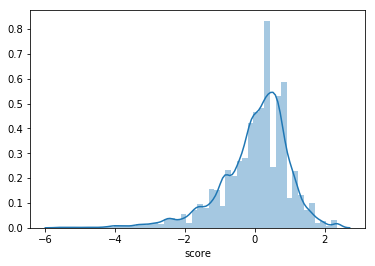

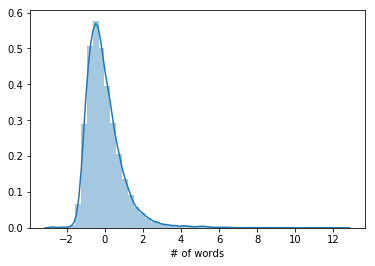

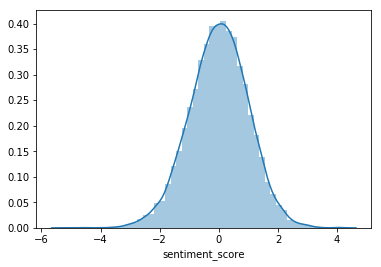

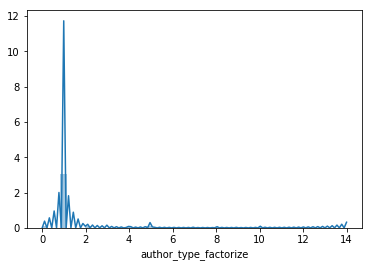

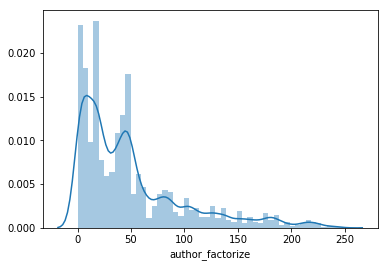

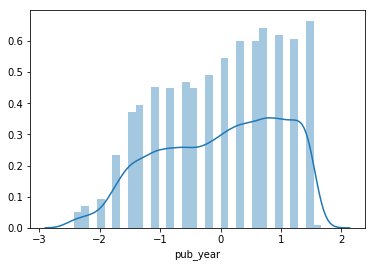

In [53]:
cprint("\n Plot features to be used in the model:",attrs=['bold'])
listcol = ['score','# of words','sentiment_score','author_type_factorize','author_factorize','pub_year']
for col in listcol:
    sns.distplot(df12[col])
    plt.show()

##### 5.b) Perform your logistic regression model. Treat the best new music variable as your dependent variable and use the release year, word count, sentiment, all genre binary variables, author, and author role as your independent variables

         Current function value: 0.115836
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                14485
Model:                          Logit   Df Residuals:                    14457
Method:                           MLE   Df Model:                           27
Date:                Wed, 06 Oct 2021   Pseudo R-squ.:                  0.4980
Time:                        21:14:14   Log-Likelihood:                -1677.9
converged:                      False   LL-Null:                       -3342.1
                                        LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.5401      0.300    -18.496      0.000      -6.127      -4.953
C(Q('author_type_factorize'))[T.1]     -1.0051      0.260     -3.860      0.000      -1.515      -0.495
C(Q('author_type_factorize'))[T.2]     -0.3782      0.314     -1.203      0.229      -0.994       0.238
C(Q('author_type_factorize'))[T.3]     -0.0799      0.584     -0.137      0.891      -1.225       1.065
C(Q('author_type_factorize'))[T.4]     -1.5803      0.412     -3.832      0.000      -2.389      -0.772
C(Q('author_type_factorize'))[T.5]     -0.2013      0.320     -0.630      0.529      -0.828       0.425
C(Q('author_type_factorize'))[T.6]      1.4787      1.335      1.107      0.268      -1.138       4.096
C(Q('author_type_factorize'))[T.7]    -25.8390   3.42e+05  -7.55e-05      1.000   -6.71e+05    6.71e+05
C(Q('author_type_factorize'))[T.8]     -1.4774      0.741     -1.995      0.046      -2.929      -0.026
C(Q('author_type_factorize'))[T.9]     -0.5956      0.527     -1.130      0.258      -1.628       0.437
C(Q('author_type_factorize'))[T.10]    -1.8031      0.701     -2.571      0.010      -3.178      -0.429
C(Q('author_type_factorize'))[T.11]    -1.2568      1.362     -0.922      0.356      -3.927       1.413
C(Q('author_type_factorize'))[T.12]     0.4451      1.573      0.283      0.777      -2.638       3.529
C(Q('author_type_factorize'))[T.13]    -0.7578      0.943     -0.804      0.422      -2.606       1.090
C(Q('author_type_factorize'))[T.14]    -1.4883      0.720     -2.067      0.039      -2.899      -0.077
score                                   4.1824      0.136     30.678      0.000       3.915       4.450
pub_year                                0.9287      0.058     16.046      0.000       0.815       1.042
Q('# of words')                         0.0268      0.040      0.664      0.506      -0.052       0.106
sentiment_score                        -0.0067      0.050     -0.134      0.893      -0.104       0.091
electronic                              0.5692      0.123      4.639      0.000       0.329       0.810
metal                                  -0.1357      0.245     -0.555      0.579      -0.615       0.344
rock                                    0.4602      0.112      4.112      0.000       0.241       0.680
rap                                     0.3835      0.192      2.000      0.046       0.008       0.759
experimental                            0.3282      0.140      2.338      0.019       0.053       0.603
Q('pop/r&b')                            0.6240      0.181      3.445      0.001       0.269       0.979
Q('folk/country')                       0.0841      0.269      0.312      0.755      -0.444       0.612
jazz                                   -0.7056      0.333     -2.118      0.034      -1.358      -0.053
Q('global')                            -0.5699      0.439     -1.298      0.194      -1.431       0.291
=================

Model Accuracy is:


0.9534691059716949

AUC ROC curve:


0.9652086185608088

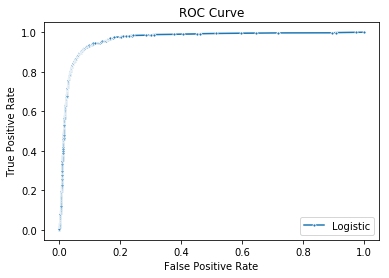

In [54]:
model = smf.logit(formula = "best_new_music ~ score + pub_year + Q('# of words') + sentiment_score + electronic + metal + rock + rap + experimental + Q('pop/r&b') + Q('folk/country') + jazz +  Q('global') + C(Q('author_type_factorize')) ",data=df12).fit()
model.summary()

## Confusion Matrix
CM = model.pred_table()
Accuracy = (CM[0][0] + CM[1][1])/(CM[0][0] + CM[0][1] + CM[1][0] + CM[1][1])

cprint("Model Accuracy is:",attrs =['bold'])
Accuracy

## ROC Curve and AUC-ROC curve of the model
cprint("AUC ROC curve:", attrs = ['bold'])
roc_auc_score(df12['best_new_music'], model.predict())
fpr,tpr,threshols = roc_curve(df12['best_new_music'], model.predict())
ax = sns.lineplot(fpr, tpr, marker='.', label='Logistic')
ax = plt.xlabel('False Positive Rate')
ax = plt.ylabel('True Positive Rate')
ax = plt.title('ROC Curve')
ax = plt.legend()
ax = plt.show()

##### 5.c) Calculate the odds ratios for your independent variables

In [55]:
Odds_summary = pd.DataFrame(np.exp(model.params), columns= ['Odds_Ratio'])
Odds_summary['Coef'] = model.params
Odds_summary['PVal'] = model.pvalues
Odds_summary.sort_values(by = 'Odds_Ratio', ascending = False)

,Odds_Ratio,Coef,PVal
score,65.52619,4.18245,0.00000
C(Q('author_type_factorize'))[T.6],4.38713,1.47867,0.26810
pub_year,2.53124,0.92871,0.00000
Q('pop/r&b'),1.86647,0.62405,0.00057
electronic,1.76686,0.56920,0.00000
rock,1.58436,0.46018,0.00004
C(Q('author_type_factorize'))[T.12],1.56067,0.44512,0.77724
rap,1.46739,0.38349,0.04554
experimental,1.38849,0.32822,0.01940
Q('folk/country'),1.08778,0.08414,0.75475


##### 5.d) What features are most/least predictive of a best new music designation and why do you think that is?

In [56]:
cprint("5 Most predictive features:", attrs = ['bold'])
Odds_summary.sort_values(by = 'Odds_Ratio', ascending=False).head(5)

5 Most predictive features:


,Odds_Ratio,Coef,PVal
score,65.52619,4.18245,0.00000
C(Q('author_type_factorize'))[T.6],4.38713,1.47867,0.26810
pub_year,2.53124,0.92871,0.00000
Q('pop/r&b'),1.86647,0.62405,0.00057
electronic,1.76686,0.56920,0.00000


In [57]:
cprint("5 Least predictive features:", attrs = ['bold'])
Odds_summary.sort_values(by = 'Odds_Ratio').head(5)

5 Least predictive features:


,Odds_Ratio,Coef,PVal
C(Q('author_type_factorize'))[T.7],0.00000,-25.83904,0.99994
Intercept,0.00393,-5.54013,0.00000
C(Q('author_type_factorize'))[T.10],0.16478,-1.80315,0.01013
C(Q('author_type_factorize'))[T.4],0.20592,-1.58029,0.00013
C(Q('author_type_factorize'))[T.14],0.22575,-1.48833,0.03869


In [58]:
sqldf("Select author_type,author_type_factorize From df12 Group By author_type Order by author_type_factorize")

,author_type,author_type_factorize
0,senior staff writer,0
1,contributor,1
2,executive editor,2
3,editor-in-chief,3
4,contributing editor,4
5,senior editor,5
6,news director,6
7,associate editor,7
8,deputy news editor,8
9,associate reviews editor,9


Most Predictive feature : Score - 65 times higher odds
<br>Least Predictive feature : Author Type 7 (Associate editor)

##### 5.e) If you were to engineer an additional feature for the regression, what would it be? Describe how you would approach constructing that feature.

An additional feature that I would want to add to the regression would be : Number of best new music albums corresponding to a specific label ('BNM_Yes')

First 10 rows of the new feature BNM_Yes - # of BNM albums corresponding to a specific label :


,label,BNM_Yes
0,domino,30
1,sub pop,25
2,4ad,23
3,warp,21
4,matador,18
5,merge,16
6,self-released,13
7,drag city,11
8,kranky,11
9,light in the attic,11


         Current function value: 0.113489
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                14485
Model:                          Logit   Df Residuals:                    14456
Method:                           MLE   Df Model:                           28
Date:                Wed, 06 Oct 2021   Pseudo R-squ.:                  0.5081
Time:                        21:32:45   Log-Likelihood:                -1643.9
converged:                      False   LL-Null:                       -3342.1
                                        LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.4183      0.300    -18.044      0.000      -6.007      -4.830
C(Q('author_type_factorize'))[T.1]     -1.1111      0.262     -4.239      0.000      -1.625      -0.597
C(Q('author_type_factorize'))[T.2]     -0.5707      0.318     -1.793      0.073      -1.195       0.053
C(Q('author_type_factorize'))[T.3]     -0.1888      0.579     -0.326      0.744      -1.324       0.946
C(Q('author_type_factorize'))[T.4]     -1.6718      0.417     -4.011      0.000      -2.489      -0.855
C(Q('author_type_factorize'))[T.5]     -0.3258      0.321     -1.014      0.311      -0.956       0.304
C(Q('author_type_factorize'))[T.6]      0.9321      1.304      0.715      0.475      -1.625       3.489
C(Q('author_type_factorize'))[T.7]    -21.4852   3.23e+04     -0.001      0.999   -6.33e+04    6.32e+04
C(Q('author_type_factorize'))[T.8]     -1.5437      0.747     -2.065      0.039      -3.009      -0.079
C(Q('author_type_factorize'))[T.9]     -0.6436      0.536     -1.200      0.230      -1.695       0.408
C(Q('author_type_factorize'))[T.10]    -1.9542      0.710     -2.753      0.006      -3.345      -0.563
C(Q('author_type_factorize'))[T.11]    -1.7845      1.480     -1.206      0.228      -4.686       1.117
C(Q('author_type_factorize'))[T.12]     0.3450      1.653      0.209      0.835      -2.895       3.585
C(Q('author_type_factorize'))[T.13]    -0.7226      0.968     -0.746      0.455      -2.620       1.175
C(Q('author_type_factorize'))[T.14]    -1.5299      0.718     -2.130      0.033      -2.938      -0.122
score                                   4.1277      0.136     30.334      0.000       3.861       4.394
pub_year                                0.9109      0.059     15.558      0.000       0.796       1.026
Q('# of words')                         0.0220      0.040      0.546      0.585      -0.057       0.101
sentiment_score                        -0.0158      0.050     -0.315      0.753      -0.115       0.083
electronic                              0.5779      0.125      4.639      0.000       0.334       0.822
metal                                  -0.0128      0.248     -0.052      0.959      -0.499       0.473
rock                                    0.3592      0.114      3.144      0.002       0.135       0.583
rap                                     0.3624      0.193      1.882      0.060      -0.015       0.740
experimental                            0.3548      0.142      2.497      0.013       0.076       0.633
Q('pop/r&b')                            0.6181      0.182      3.394      0.001       0.261       0.975
Q('folk/country')                       0.0103      0.272      0.038      0.970      -0.523       0.543
jazz                                   -0.5812      0.336     -1.731      0.083      -1.239       0.077
Q('global')                            -0.3890      0.436     -0.893      0.372      -1.243       0.465
BNM_Yes          

Model Accuracy after adding the engineered feature is:


0.9545736969278564

AUC ROC curve with added feature BNM_Yes for labels:


0.966007007288255

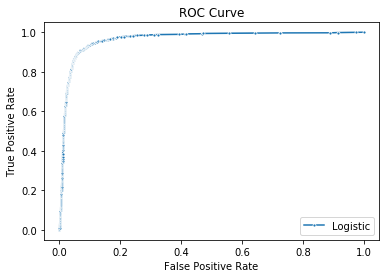

In [59]:
bnmy = sqldf("SELECT * FROM df12 WHERE best_new_music = 1 ")
df_bnmy_labelcnt = sqldf("SELECT label, Count(*) BNM_Yes from bnmy group by label order by BNM_Yes DESC")

cprint("First 10 rows of the new feature BNM_Yes - # of BNM albums corresponding to a specific label :", attrs = ['bold'])
df_bnmy_labelcnt.head(10)

df12_added_feature = pd.merge(df12,df_bnmy_labelcnt,on='label',how='outer')
df12_added_feature['BNM_Yes'] = df12_added_feature['BNM_Yes'].fillna(0)

scaler = StandardScaler()
df12_added_feature[["BNM_Yes"]] = scaler.fit_transform(df12_added_feature[["BNM_Yes"]])

model1 = smf.logit(formula = "best_new_music ~ score + pub_year + Q('# of words') + sentiment_score + electronic + metal + rock + rap + experimental + Q('pop/r&b') + Q('folk/country') + jazz +  Q('global') + C(Q('author_type_factorize')) + BNM_Yes ",data=df12_added_feature).fit()
model1.summary()

## Confusion Matrix
CM = model1.pred_table()
Accuracy = (CM[0][0] + CM[1][1])/(CM[0][0] + CM[0][1] + CM[1][0] + CM[1][1])

cprint("Model Accuracy after adding the engineered feature is:",attrs =['bold'])
Accuracy

## ROC Curve and AUC-ROC curve of the model
cprint("AUC ROC curve with added feature BNM_Yes for labels:", attrs = ['bold'])
roc_auc_score(df12_added_feature['best_new_music'], model1.predict())
fpr,tpr,threshols = roc_curve(df12_added_feature['best_new_music'], model1.predict())
ax = sns.lineplot(fpr, tpr, marker='.', label='Logistic')
ax = plt.xlabel('False Positive Rate')
ax = plt.ylabel('True Positive Rate')
ax = plt.title('ROC Curve')
ax = plt.legend()
ax = plt.show()

Accuracy of the model and AUC ROC curve improved with the added new feature (Number of best new music albums corresponding to a specific label)

Add another additional feature on top of the previous one. The new feature is "Number of BNM albums produced by an artist (BNMY_Count)"

New feature BNMY_Count - # of BNM albums produced by an artist:


,artist,BNMY_Count
0,various artists,26
1,deerhunter,6
2,kanye west,6
3,radiohead,6
4,animal collective,5
5,m83,5
6,sufjan stevens,5
7,arcade fire,4
8,beach house,4
9,burial,4


         Current function value: 0.113204
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         best_new_music   No. Observations:                14485
Model:                          Logit   Df Residuals:                    14455
Method:                           MLE   Df Model:                           29
Date:                Wed, 06 Oct 2021   Pseudo R-squ.:                  0.5094
Time:                        21:34:42   Log-Likelihood:                -1639.8
converged:                      False   LL-Null:                       -3342.1
                                        LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -5.5693      0.306    -18.213      0.000      -6.169      -4.970
C(Q('author_type_factorize'))[T.1]     -1.1092      0.263     -4.225      0.000      -1.624      -0.595
C(Q('author_type_factorize'))[T.2]     -0.5397      0.319     -1.693      0.090      -1.164       0.085
C(Q('author_type_factorize'))[T.3]     -0.1508      0.581     -0.260      0.795      -1.289       0.987
C(Q('author_type_factorize'))[T.4]     -1.6134      0.418     -3.856      0.000      -2.434      -0.793
C(Q('author_type_factorize'))[T.5]     -0.3087      0.322     -0.959      0.338      -0.940       0.322
C(Q('author_type_factorize'))[T.6]      0.9901      1.308      0.757      0.449      -1.573       3.554
C(Q('author_type_factorize'))[T.7]    -14.0019    755.186     -0.019      0.985   -1494.139    1466.135
C(Q('author_type_factorize'))[T.8]     -1.5016      0.748     -2.008      0.045      -2.967      -0.036
C(Q('author_type_factorize'))[T.9]     -0.5971      0.539     -1.108      0.268      -1.654       0.460
C(Q('author_type_factorize'))[T.10]    -1.9692      0.711     -2.770      0.006      -3.363      -0.576
C(Q('author_type_factorize'))[T.11]    -1.7722      1.478     -1.199      0.231      -4.670       1.125
C(Q('author_type_factorize'))[T.12]     0.3695      1.664      0.222      0.824      -2.891       3.630
C(Q('author_type_factorize'))[T.13]    -0.6996      0.963     -0.727      0.467      -2.586       1.187
C(Q('author_type_factorize'))[T.14]    -1.4965      0.719     -2.082      0.037      -2.906      -0.087
score                                   4.1071      0.136     30.217      0.000       3.841       4.373
pub_year                                0.9289      0.059     15.688      0.000       0.813       1.045
Q('# of words')                         0.0065      0.041      0.161      0.872      -0.073       0.086
sentiment_score                        -0.0267      0.050     -0.529      0.597      -0.126       0.072
electronic                              0.6830      0.130      5.262      0.000       0.429       0.937
metal                                   0.1039      0.251      0.414      0.679      -0.388       0.595
rock                                    0.5123      0.127      4.048      0.000       0.264       0.760
rap                                     0.5258      0.201      2.616      0.009       0.132       0.920
experimental                            0.4252      0.144      2.949      0.003       0.143       0.708
Q('pop/r&b')                            0.7510      0.188      4.002      0.000       0.383       1.119
Q('folk/country')                       0.1808      0.277      0.652      0.515      -0.363       0.725
jazz                                   -0.4515      0.337     -1.341      0.180      -1.111       0.208
Q('global')                            -0.3258      0.437     -0.745      0.456      -1.183       0.531
BNM_Yes          

Model Accuracy after adding the 2 engineered features is:


0.954297549188816

AUC ROC curve with 2 added features:


0.9659951762428638

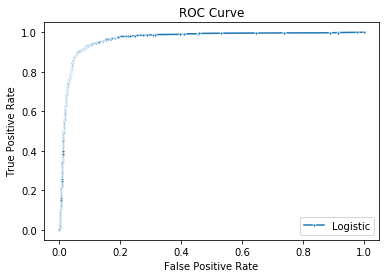

,Odds_Ratio
score,60.76741
C(Q('author_type_factorize'))[T.6],2.69162
pub_year,2.53162
Q('pop/r&b'),2.11918
electronic,1.97982
rap,1.69174
rock,1.66919
experimental,1.52989
C(Q('author_type_factorize'))[T.12],1.44703
BNM_Yes,1.36755


In [60]:
## Constructing the new feature 'BNMY_Count'
BNMY_COUNT = sqldf("SELECT artist, Count(*) BNMY_Count from bnmy group by artist order by BNMY_Count DESC")

cprint("New feature BNMY_Count - # of BNM albums produced by an artist:", attrs = ['bold'])
BNMY_COUNT.head(10)

df12_added_feature2 = pd.merge(df12_added_feature,BNMY_COUNT,on='artist',how='outer')
df12_added_feature2['BNMY_Count'] = df12_added_feature2['BNMY_Count'].fillna(0)

scaler = StandardScaler()
df12_added_feature2[["BNMY_Count"]] = scaler.fit_transform(df12_added_feature2[["BNMY_Count"]])

model2 = smf.logit(formula = "best_new_music ~ score + pub_year + Q('# of words') + sentiment_score + electronic + metal + rock + rap + experimental + Q('pop/r&b') + Q('folk/country') + jazz +  Q('global') + C(Q('author_type_factorize')) + BNM_Yes + BNMY_Count",data=df12_added_feature2).fit()
model2.summary()

## Confusion Matrix
CM = model2.pred_table()
Accuracy = (CM[0][0] + CM[1][1])/(CM[0][0] + CM[0][1] + CM[1][0] + CM[1][1])

cprint("Model Accuracy after adding the 2 engineered features is:",attrs =['bold'])
Accuracy

## ROC Curve and AUC-ROC curve of the model
cprint("AUC ROC curve with 2 added features:", attrs = ['bold'])
roc_auc_score(df12_added_feature2['best_new_music'], model2.predict())
fpr,tpr,threshols = roc_curve(df12_added_feature2['best_new_music'], model2.predict())
ax = sns.lineplot(fpr, tpr, marker='.', label='Logistic')
ax = plt.xlabel('False Positive Rate')
ax = plt.ylabel('True Positive Rate')
ax = plt.title('ROC Curve')
ax = plt.legend()
ax = plt.show()

Odds_summary = pd.DataFrame(np.exp(model2.params), columns= ['Odds_Ratio'])
Odds_summary.sort_values(by = 'Odds_Ratio', ascending = False)

The 2 additional features that were added have Odds Ratio of > 1 and thus indicate a greater likelihood of occurence

## 6) Data Visualization (Optional): 

Using the results from your regression and data analysis create a visualization that tells a story about the data. Feel free to take personal liberties with this and be as creative as you like. 

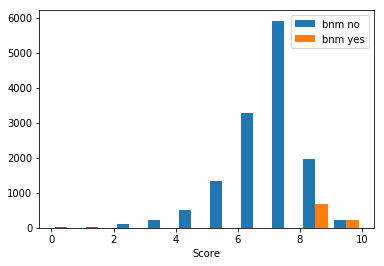

In [61]:
s=[]
s.append(df11.loc[df11['best_new_music'] == 0]['score'].tolist())
s.append(df11.loc[df11['best_new_music'] == 1]['score'].tolist())

plt.hist(s)
plt.legend(['bnm no', 'bnm yes'])
plt.xlabel('Score');

From the above distribution of scores we can see that most of the scores are between 6 and 8.
<br>Also most of the "best new music" albums have a score value > 8.

Most Reviewed Genre:


,GENRE,BNM_Yes,BNM_No,Total,%Yes,%No
2,rock,493,6669,7162,0.06884,0.93116
0,electronic,177,2903,3080,0.05747,0.94253
4,experimental,115,1328,1443,0.07970,0.92030
3,rap,72,1199,1271,0.05665,0.94335
5,pop/r&b,83,1058,1141,0.07274,0.92726
1,metal,25,560,585,0.04274,0.95726
6,folk/country,25,521,546,0.04579,0.95421
7,jazz,17,294,311,0.05466,0.94534
8,global,8,166,174,0.04598,0.95402



Genre with highest % of 'Best New Music' status:


,GENRE,BNM_Yes,BNM_No,Total,%Yes,%No
4,experimental,115,1328,1443,0.07970,0.92030
5,pop/r&b,83,1058,1141,0.07274,0.92726
2,rock,493,6669,7162,0.06884,0.93116
0,electronic,177,2903,3080,0.05747,0.94253
3,rap,72,1199,1271,0.05665,0.94335
7,jazz,17,294,311,0.05466,0.94534
8,global,8,166,174,0.04598,0.95402
6,folk/country,25,521,546,0.04579,0.95421
1,metal,25,560,585,0.04274,0.95726


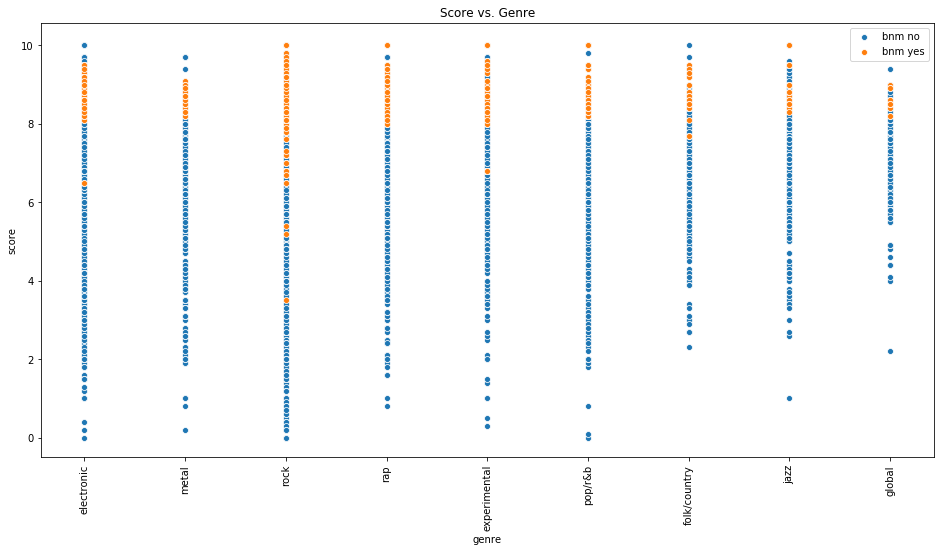

In [62]:
genre_list = ['electronic', 'metal', 'rock', 'rap', 'experimental','pop/r&b', 'folk/country', 'jazz', 'global']
bnmy = []
bnmn = []
df13 = pd.DataFrame(columns = ['GENRE','BNM_Yes','BNM_No'])
for genre in genre_list:
    bnmy.append(df12.loc[(df12[genre] == 1) & (df12['best_new_music'] == 1)].shape[0])
    bnmn.append(df12.loc[(df12[genre] == 1) & (df12['best_new_music'] == 0)].shape[0])
df13['GENRE'] = pd.Series(genre_list)
df13['BNM_Yes'] = pd.Series(bnmy)
df13['BNM_No'] = pd.Series(bnmn)
df13['Total'] = df13.sum(axis = 1)
df13['%Yes'] = df13['BNM_Yes']/df13['Total']
df13['%No'] = df13['BNM_No']/df13['Total']

cprint("Most Reviewed Genre:",attrs = ['bold'])
df13.sort_values(by = "Total", ascending = False)

cprint("\nGenre with highest % of 'Best New Music' status:",attrs = ['bold'])
df13.sort_values(by = "%Yes", ascending = False)

fig, ax = plt.subplots(figsize=(16,8))
df_bnmy = sqldf("SELECT * FROM df1 WHERE best_new_music = 1 ")
df_bnmn = sqldf("SELECT * FROM df1 WHERE best_new_music = 0 ")
ax = sns.scatterplot(x="genre", y="score",  data=df_bnmn)
ax = sns.scatterplot(x="genre", y="score",  data=df_bnmy)
ax = plt.xticks(rotation=90)
ax = plt.legend(['bnm no', 'bnm yes'])
ax = plt.title("Score vs. Genre")
ax = plt.show()


Most Reviewed Genre : rock followed by electronic
<br>Least Reviewed Genre : global
<br>Genre with highest % of 'Best New Music' status : experimental followed by pop/r&b
<br>Genre with least % of 'Best New Music' status : metal
<br>Scores of the albums across all genres that have 'Best New Music' status is mostly > 8.0

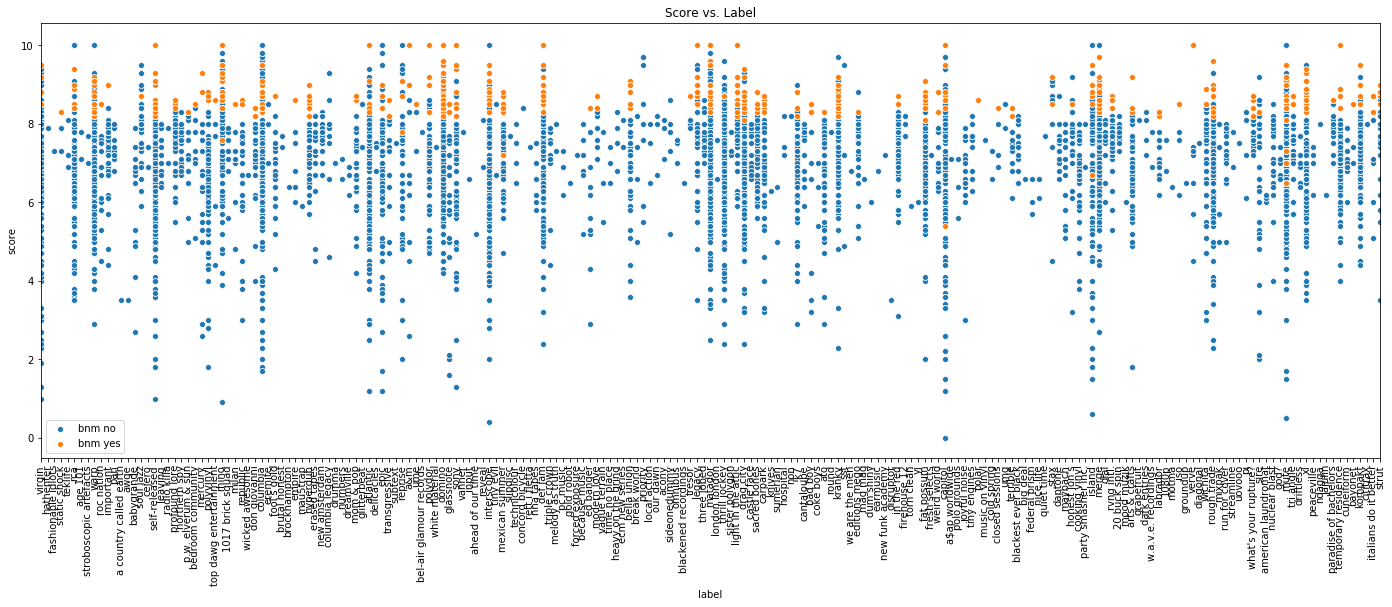

In [63]:
fig, ax = plt.subplots(figsize=(24,8))
ax = sns.scatterplot(x="label", y="score",  data=df_bnmn)
ax = sns.scatterplot(x="label", y="score",  data=df_bnmy)
ax = plt.xticks(rotation=90)
ax = plt.legend(['bnm no', 'bnm yes'])
ax = plt.xlim(0, 200.0)
ax = plt.title("Score vs. Label")
ax = plt.show()

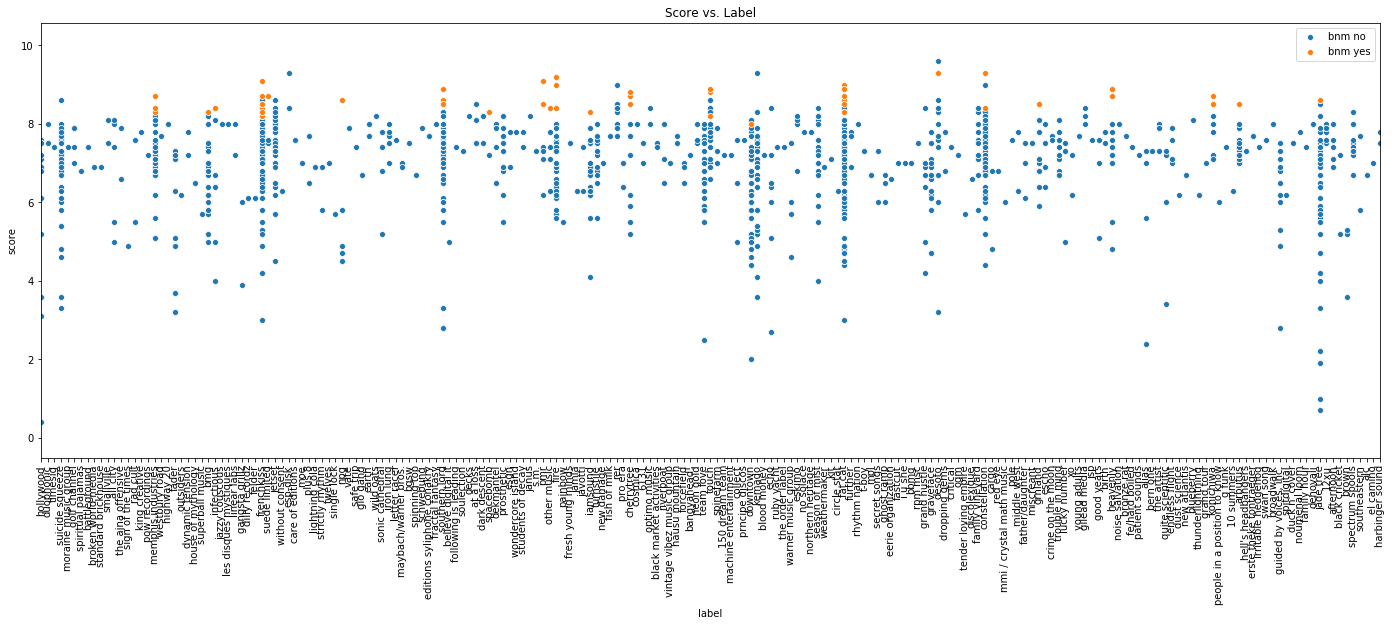

In [64]:
fig, ax = plt.subplots(figsize=(24,8))
ax = sns.scatterplot(x="label", y="score",  data=df_bnmn)
ax = sns.scatterplot(x="label", y="score",  data=df_bnmy)
ax = plt.xticks(rotation=90)
ax = plt.legend(['bnm no', 'bnm yes'])
ax = plt.xlim(600.0, 800.0)
ax = plt.title("Score vs. Label")
ax = plt.show()

From the above  two graphs that are zoomed in to concentrate on different sections (labels) of the Score vs Labels plots : <br>Scores of albums that have 'Best New Music (BNM)' status is mostly > 8. 
<br>BNM is concentrated in some labels only vs all( BNM is not uniformly distributed across all labels)

In [65]:
df_bnmy_labelcnt = sqldf("SELECT label, Count(*) BNM_Yes from df_bnmy group by label order by BNM_Yes DESC")
df_bnmn_labelcnt = sqldf("SELECT label, Count(*) BNM_No from df_bnmn group by label order by BNM_No DESC")

df_labelcnt = pd.merge(df_bnmy_labelcnt, df_bnmn_labelcnt, on = 'label')
df_labelcnt['Total'] = df_labelcnt.sum(axis = 1)
df_labelcnt['%Yes'] = df_labelcnt['BNM_Yes']/df_labelcnt['Total']
df_labelcnt['%No'] = df_labelcnt['BNM_No']/df_labelcnt['Total']

cprint("Top 10 Label with highest No. of 'Best New Music' status:",attrs = ['bold'])
df_labelcnt.sort_values(by = 'BNM_Yes', ascending = False).head(10)

cprint("\nTop 10 Label with highest No. of 'Not Best New Music' status:",attrs = ['bold'])
df_labelcnt.sort_values(by = 'BNM_No', ascending = False).head(10)

cprint("\nTop 10 Labels that is most reviewed:",attrs = ['bold'])
df_labelcnt.sort_values(by = 'Total', ascending = False).head(10)

cprint("\nTop 10 Label with highest % of 'Best New Music' status:",attrs = ['bold'])
df_labelcnt.sort_values(by = '%Yes', ascending = False).head(10)

cprint("\nTop 10 Label with highest % of 'Not Best New Music' status:",attrs = ['bold'])
df_labelcnt.sort_values(by = '%No', ascending = False).head(10)

Top 10 Label with highest No. of 'Best New Music' status:


,label,BNM_Yes,BNM_No,Total,%Yes,%No
0,domino,47,246,293,0.16041,0.83959
1,sub pop,40,307,347,0.11527,0.88473
2,4ad,39,107,146,0.26712,0.73288
3,mute,36,228,264,0.13636,0.86364
4,matador,28,211,239,0.11715,0.88285
5,universal,28,102,130,0.21538,0.78462
6,warp,25,227,252,0.09921,0.90079
7,light in the attic,24,67,91,0.26374,0.73626
8,merge,24,261,285,0.08421,0.91579
9,secretly canadian,24,135,159,0.15094,0.84906



Top 10 Label with highest No. of 'Not Best New Music' status:


,label,BNM_Yes,BNM_No,Total,%Yes,%No
12,self-released,21,505,526,0.03992,0.96008
339,thrill jockey,1,342,343,0.00292,0.99708
20,drag city,15,317,332,0.04518,0.95482
1,sub pop,40,307,347,0.11527,0.88473
8,merge,24,261,285,0.08421,0.91579
0,domino,47,246,293,0.16041,0.83959
10,columbia,21,238,259,0.08108,0.91892
3,mute,36,228,264,0.13636,0.86364
6,warp,25,227,252,0.09921,0.90079
4,matador,28,211,239,0.11715,0.88285



Top 10 Labels that is most reviewed:


,label,BNM_Yes,BNM_No,Total,%Yes,%No
12,self-released,21,505,526,0.03992,0.96008
1,sub pop,40,307,347,0.11527,0.88473
339,thrill jockey,1,342,343,0.00292,0.99708
20,drag city,15,317,332,0.04518,0.95482
0,domino,47,246,293,0.16041,0.83959
8,merge,24,261,285,0.08421,0.91579
3,mute,36,228,264,0.13636,0.86364
10,columbia,21,238,259,0.08108,0.91892
6,warp,25,227,252,0.09921,0.90079
4,matador,28,211,239,0.11715,0.88285



Top 10 Label with highest % of 'Best New Music' status:


,label,BNM_Yes,BNM_No,Total,%Yes,%No
61,industrial,6,1,7,0.85714,0.14286
130,zzt,3,1,4,0.75000,0.25000
157,death waltz,2,1,3,0.66667,0.33333
166,fish people,2,1,3,0.66667,0.33333
138,already gone,2,1,3,0.66667,0.33333
168,fool house,2,1,3,0.66667,0.33333
84,diwphalanx,4,2,6,0.66667,0.33333
206,something in construction,2,1,3,0.66667,0.33333
199,polar,2,1,3,0.66667,0.33333
186,ll,2,1,3,0.66667,0.33333



Top 10 Label with highest % of 'Not Best New Music' status:


,label,BNM_Yes,BNM_No,Total,%Yes,%No
339,thrill jockey,1,342,343,0.00292,0.99708
321,relapse,1,122,123,0.00813,0.99187
305,nonesuch,1,85,86,0.01163,0.98837
297,load,1,66,67,0.01493,0.98507
327,smalltown supersound,1,65,66,0.01515,0.98485
263,dischord,1,61,62,0.01613,0.98387
140,anti-,2,116,118,0.01695,0.98305
342,troubleman unlimited,1,58,59,0.01695,0.98305
231,ato,1,55,56,0.01786,0.98214
268,editions mego,1,52,53,0.01887,0.98113


From the above tables, we can see that the labels that have highest number of BNM albums corresponding to that specific label have lower % of BNM albums corresponding to that specific label.
<br>Also the labels that are most reviewed are the ones that have highest number of BNM albums.

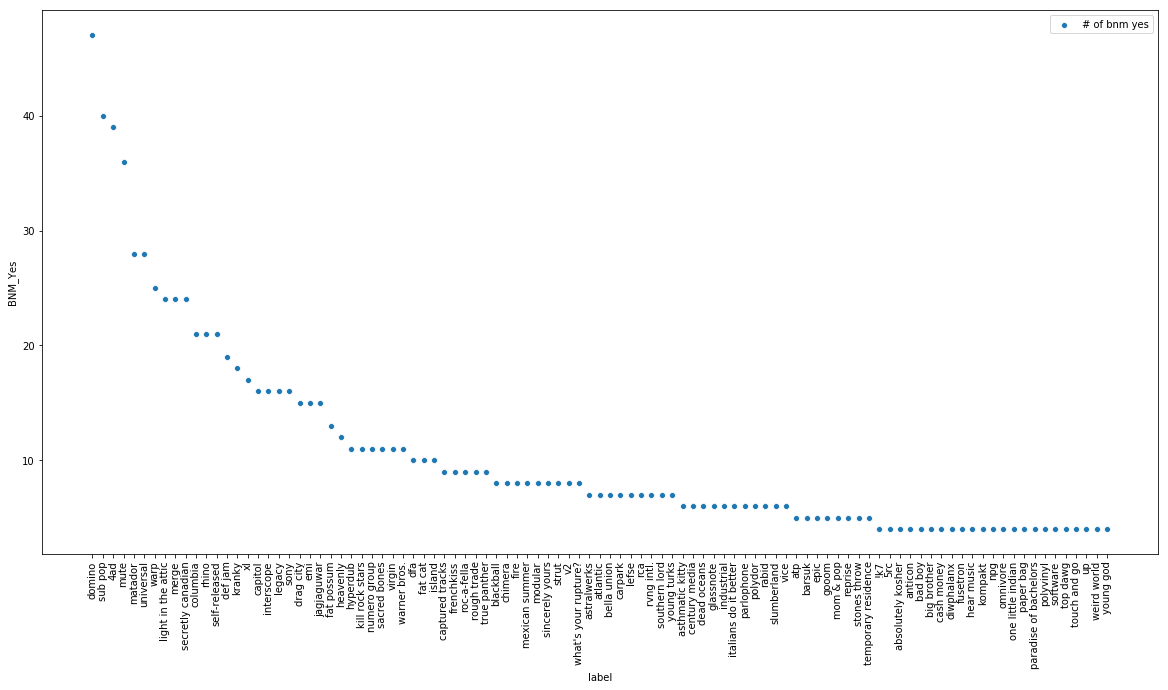

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x="label", y="BNM_Yes",  data=df_labelcnt.head(100))
ax = plt.xticks(rotation=90)
ax = plt.legend(['# of bnm yes'])
ax = plt.show()

From the above plot, we can see that the number of albums with 'Best New Music (BNM)' status are concentrated around few labels only